In [1]:
# Parameters Tuning
#    Objectif: looking for the best parameters to improve the model of random forest 
#    Input: 
#     preprocessed data without PCA:
#        x_train.csv 
#        y_train.csv 
#        x_test.csv 
#        y_test.csv 
#   Output:
#    best parameters 

#    Author: SOUAD BOUTANE 
#same lines of code than 'RF_PCA_tuningParam.ipynb' the only difference is in data


In [2]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import warnings

from matplotlib.legend_handler import HandlerLine2D

#Models
from sklearn.ensemble import RandomForestClassifier


#Split data
from sklearn.model_selection import train_test_split


#Test confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, roc_curve, auc


C:\Users\souad\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
######################################   LOAD DATA:   ################################

X = np.genfromtxt('../../data/x_train.csv', delimiter=',')
Y=np.genfromtxt('../../data/y_train.csv', delimiter=',')

X.shape

In [5]:
#####################################   Building Models   #############################
############################# Parameter tuning for Random Forest ######################

#Because of the large datatraining we select only 5% to tuning the model 
x_train, x_test, y_train,y_test=train_test_split(X, Y, test_size=0.2)
print("training: ",x_train.shape)
print("test :",x_test.shape)


training:  (1328681, 9)
test : (332171, 9)


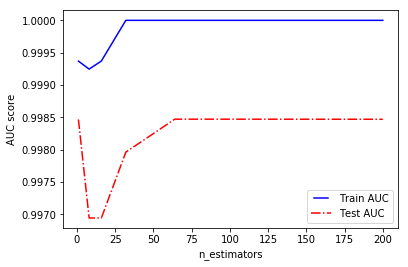

In [7]:
#####################################   Building Models   #############################
############################# Parameter tuning for Random Forest ######################
#=---------n_estimator

n_estimators = [1, 8, 16, 32, 64, 100, 200]

train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train, y_train)

   train_pred = rf.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, '-.r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

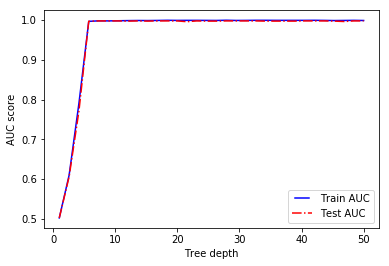

In [6]:
#####################################   Building Models   #############################
############################# Parameter tuning for Random Forest ######################
#=---------max_depth

max_depths = np.linspace(1, 50, 32, endpoint=True)

train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(x_train, y_train)

   train_pred = rf.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, '-.r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

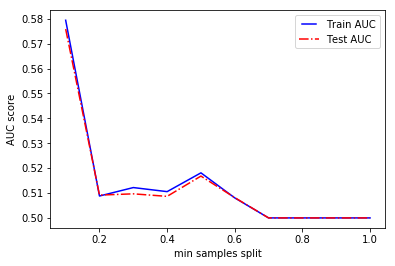

In [9]:
#####################################   Building Models   #############################
############################# Parameter tuning for Random Forest ######################
#=---------min_samples_splits
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(x_train, y_train)

   train_pred = rf.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, '-.r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

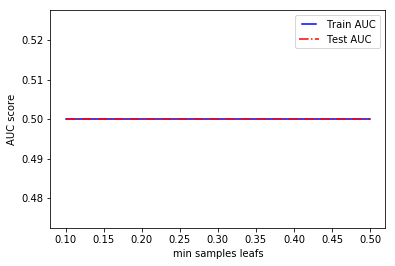

In [10]:
#####################################   Building Models   #############################
############################# Parameter tuning for Random Forest ######################
#=---------min_samples_leafs

min_samples_leafs = np.linspace(0.1,0.5, 10, endpoint=True)#np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(x_train, y_train)

   train_pred = rf.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

    
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, '-.r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leafs')
plt.show()

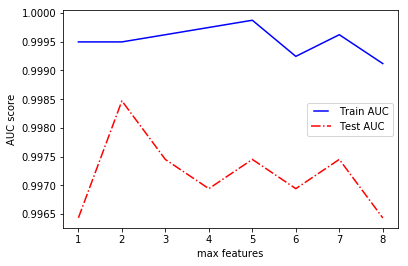

In [11]:
#####################################   Building Models   #############################
############################# Parameter tuning for Random Forest ######################
#=---------max_features
max_features = list(range(1,X.shape[1]))

train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features=max_feature)
   rf.fit(x_train, y_train)

   train_pred = rf.predict(x_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = rf.predict(x_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, '-.r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()